#PRCP-1022-HospitalStayPred


**Project** **Type**: Supervised Machine Learning -Regression

Task 1:- Prepare a complete data analysis report on the given data.

Task 2:- Create a machine learning model to predict the length of stay (in days) of a
patient entering the Hospital, given various factors about their stay.

**1.Introduction:**

Hospitals handle a large volume of patient admissions daily. Efficient hospital management depends on understanding patient flow, resource utilization, and expected length of stay. Predicting and analyzing the length of stay helps hospitals optimize bed allocation, staffing, and treatment planning.

This report presents a comprehensive data analysis of hospital admission data to understand the factors influencing the length of stay of patients.

**2.The objectives of this data analysis are:**

The objectives of this data analysis are:

To understand the structure and quality of the dataset

To identify patterns and relationships among variables

To analyze factors affecting the patient length of stay

To prepare the dataset for machine learning modeling

In [1]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("HealthCareAnalytics.csv")
df

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144,Nov-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235,Nov-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,Nov-20,3761,Nov-20


**3.Dataset Description:**

The dataset consists of 318,438 hospital admission records with 18 attributes, covering hospital details, patient demographics, admission information, and treatment-related factors.

**Target Variable:**

Stay - Length of hospital stay (originally provided as ranges)

**Dataset Structure:**
| Category             | Description                       |
| -------------------- | --------------------------------- |
| Hospital Information | Hospital code, type, city, region |
| Patient Information  | Age group, city, visitors         |
| Admission Details    | Admission type, department, ward  |
| Clinical Details     | Severity of illness, bed grade    |
| Financial Details    | Admission deposit                 |
| Target               | Length of stay                    |


In [3]:
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50


In [4]:
# View last 5 rows
df.tail()


,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144,Nov-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235,Nov-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,Nov-20,3761,Nov-20
318437,318438,19,a,7,Y,5,gynecology,Q,C,2.0,21641,8.0,Emergency,Minor,2,Nov-20,4752,0-10


In [5]:
# Dataset shape (rows, columns)
df.shape


(318438, 18)

In [6]:
# Column names
df.columns


Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available_Extra_Rooms_in_Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed_Grade',
       'patientid', 'City_Code_Patient', 'Type_of_Admission',
       'Severity_of_Illness', 'Visitors_with_Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available_Extra_Rooms_in_Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed_Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [8]:
df.describe()


,case_id,Hospital_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Bed_Grade,patientid,City_Code_Patient,Visitors_with_Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276847,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


In [9]:
df.isnull().sum()


,0
case_id,0
Hospital_code,0
Hospital_type_code,0
City_Code_Hospital,0
Hospital_region_code,0
Available_Extra_Rooms_in_Hospital,0
Department,0
Ward_Type,0
Ward_Facility_Code,0
Bed_Grade,113


In [10]:
# Percentage of missing values
(df.isnull().sum() / len(df)) * 100


,0
case_id,0.000000
Hospital_code,0.000000
Hospital_type_code,0.000000
City_Code_Hospital,0.000000
Hospital_region_code,0.000000
Available_Extra_Rooms_in_Hospital,0.000000
Department,0.000000
Ward_Type,0.000000
Ward_Facility_Code,0.000000
Bed_Grade,0.035486


In [11]:
# Fill Bed_Grade with median
df['Bed_Grade'].fillna(df['Bed_Grade'].median(), inplace=True)

# Fill City_Code_Patient with mode
df['City_Code_Patient'].fillna(df['City_Code_Patient'].mode()[0], inplace=True)


**4. Missing Value Analysis**

**Two columns contained missing values:**
| Column            | Handling Method     |
| ----------------- | ------------------- |
| Bed_Grade         | Filled using median |
| City_Code_Patient | Filled using mode   |


In [12]:
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50


In [13]:
df.drop(['case_id', 'patientid'], axis=1, inplace=True)


In [14]:
df.duplicated().sum()

np.int64(154)

In [15]:
# ==== Check duplicate values ====
# ==== Total number of rows ====
total_rows = len(df)

# ==== Count duplicate rows ====
duplicate_count = df.duplicated().sum()

# ==== Percentage of duplicates ====
duplicate_percentage = (duplicate_count / total_rows) * 100

print(f"Total Rows: {total_rows}")
print(f"Duplicate Rows: {duplicate_count}")
print(f"Percentage of Duplicates: {duplicate_percentage:.2f}%")

Total Rows: 318438
Duplicate Rows: 154
Percentage of Duplicates: 0.05%


In [16]:
# View duplicate rows
df[df.duplicated()]


,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
576,14,a,1,X,4,gynecology,Q,E,2.0,9.0,Trauma,Moderate,4,31-40,4414,21-30
1179,28,b,11,X,2,gynecology,R,F,4.0,8.0,Trauma,Moderate,4,81-90,4944,31-40
2356,13,a,5,Z,4,anesthesia,R,F,4.0,1.0,Trauma,Extreme,3,41-50,4025,71-80
2358,23,a,6,X,2,anesthesia,R,F,2.0,1.0,Urgent,Extreme,6,41-50,3538,51-60
15738,23,a,6,X,2,gynecology,R,F,3.0,8.0,Urgent,Moderate,10,51-60,4469,More than 100 Days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295923,4,a,4,X,2,gynecology,R,F,3.0,10.0,Emergency,Extreme,2,61-70,4151,21-30
298233,23,a,6,X,2,gynecology,Q,F,4.0,8.0,Trauma,Minor,8,51-60,4181,More than 100 Days
298234,23,a,6,X,2,gynecology,Q,F,4.0,8.0,Trauma,Minor,8,51-60,4181,More than 100 Days
304087,22,g,9,Y,1,TB & Chest disease,S,B,1.0,6.0,Urgent,Moderate,4,31-40,5317,21-30


In [17]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Verify removal
df.duplicated().sum()


np.int64(0)

**5. Duplicate Records Analysis**

Total Rows: 318,438

Duplicate Rows: 154

Duplicate Percentage: 0.05%

Duplicate rows were removed to maintain data integrity.

In [18]:
stay_mapping = {
    '0-10': 5,
    '11-20': 15,
    '21-30': 25,
    '31-40': 35,
    '41-50': 45,
    '51-60': 55,
    '61-70': 65,
    '71-80': 75,
    '81-90': 85,
    '91-100': 95,
    'More than 100': 105
}

df['Stay'] = df['Stay'].map(stay_mapping)


**6. Target Variable Transformation**

The target variable Stay was provided in categorical ranges (e.g., 0-10, 11-20).
To enable numerical analysis and regression modeling, these ranges were converted into numeric midpoints.

This transformation allowed the problem to be treated as a regression task.

**7. Exploratory Data Analysis (EDA)**

Univariate Analysis (Numerical)


**Admission Deposit:**

1.Right-skewed distribution

2.Majority of patients pay moderate deposits

3.High deposits indicate long-term or intensive treatment

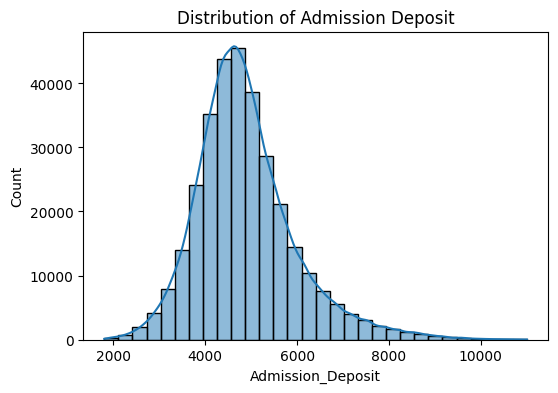

In [19]:
#Admission Deposit
plt.figure(figsize=(6,4))
sns.histplot(df['Admission_Deposit'], bins=30, kde=True)
plt.title("Distribution of Admission Deposit")
plt.show()


**Visitors with Patient**:

1.Most patients have 0-2 visitors

2.Very few cases exceed 5 visitors

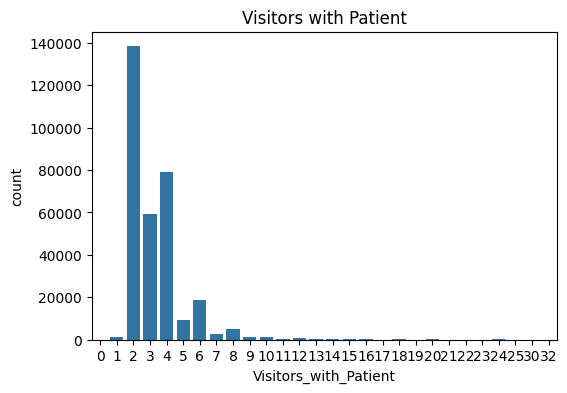

In [20]:
#Visitors with Patient
plt.figure(figsize=(6,4))
sns.countplot(x='Visitors_with_Patient', data=df)
plt.title("Visitors with Patient")
plt.show()


**Available Extra Rooms**:

1.Most hospitals have limited extra room availability

2.Indicates high bed utilization

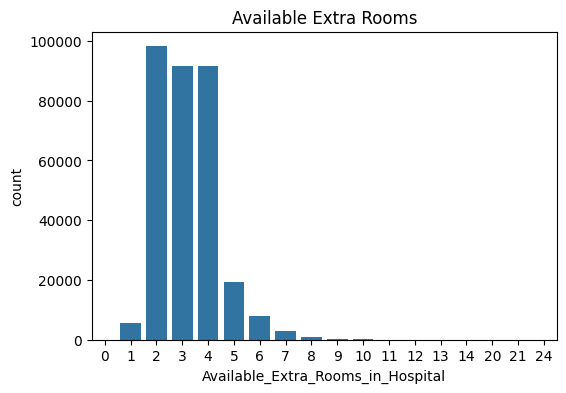

In [21]:
#Extra Rooms
plt.figure(figsize=(6,4))
sns.countplot(x='Available_Extra_Rooms_in_Hospital', data=df)
plt.title("Available Extra Rooms")
plt.show()


Univariate Analysis (Categorical)

**Type of Admission:**

1.Trauma admissions dominate

2.Emergency admissions, though fewer, tend to have longer stays



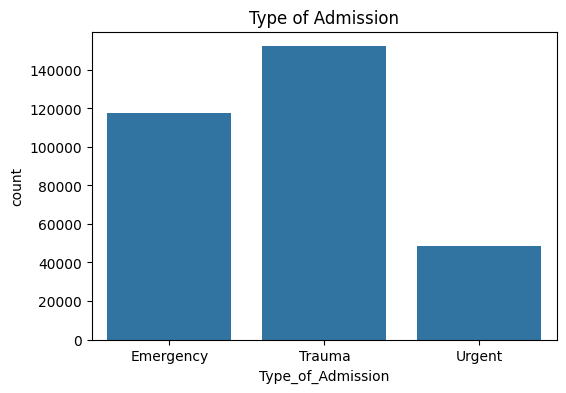

In [22]:
#Type of Admission
plt.figure(figsize=(6,4))
sns.countplot(x='Type_of_Admission', data=df)
plt.title("Type of Admission")
plt.show()


**Severity of Illness**

1.Majority of cases fall under Moderate and Extreme

2.Minor severity cases are fewer

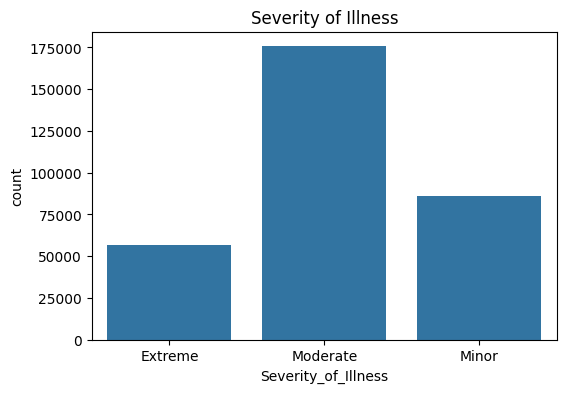

In [23]:
#Severity of Illness
plt.figure(figsize=(6,4))
sns.countplot(x='Severity_of_Illness', data=df)
plt.title("Severity of Illness")
plt.show()


Bivariate Analysis (Feature vs Stay)

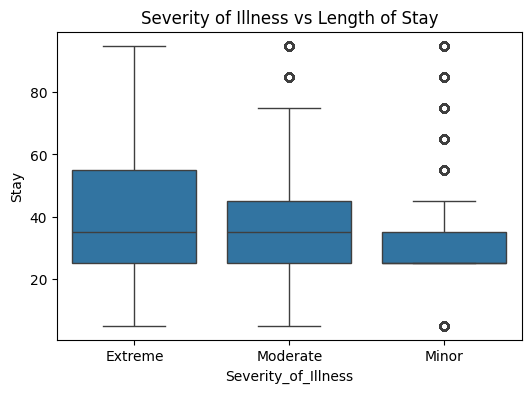

In [24]:
#Severity vs Stay
plt.figure(figsize=(6,4))
sns.boxplot(x='Severity_of_Illness', y='Stay', data=df)
plt.title("Severity of Illness vs Length of Stay")
plt.show()

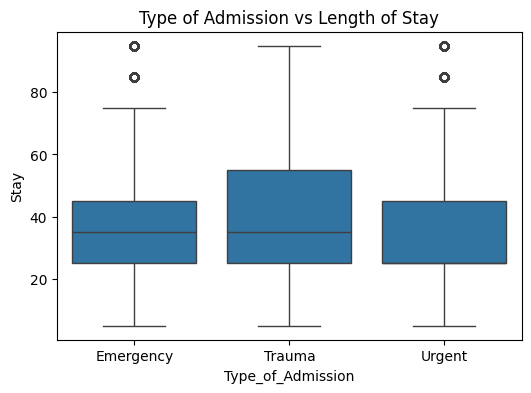

In [25]:
#Admission Type vs Stay
plt.figure(figsize=(6,4))
sns.boxplot(x='Type_of_Admission', y='Stay', data=df)
plt.title("Type of Admission vs Length of Stay")
plt.show()

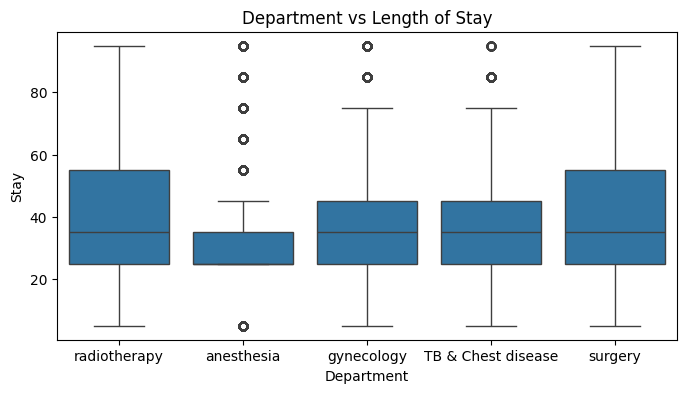

In [26]:
#Department vs Stay (Top 5)
top_dept = df['Department'].value_counts().head(5).index

plt.figure(figsize=(8,4))
sns.boxplot(x='Department', y='Stay', data=df[df['Department'].isin(top_dept)])
plt.title("Department vs Length of Stay")
plt.show()

**8. Bivariate Analysis (Feature vs Length of Stay)**

**Key relationships observed:**

Feature	Observation:

* Severity of Illness	Higher severity → longer stay

* Type of Admission	Trauma & Emergency → longer stay

* Department	Specialized departments → longer stay

* Admission Deposit	Higher deposit → longer stay


These relationships indicate strong dependence of stay duration on medical severity and treatment complexity.

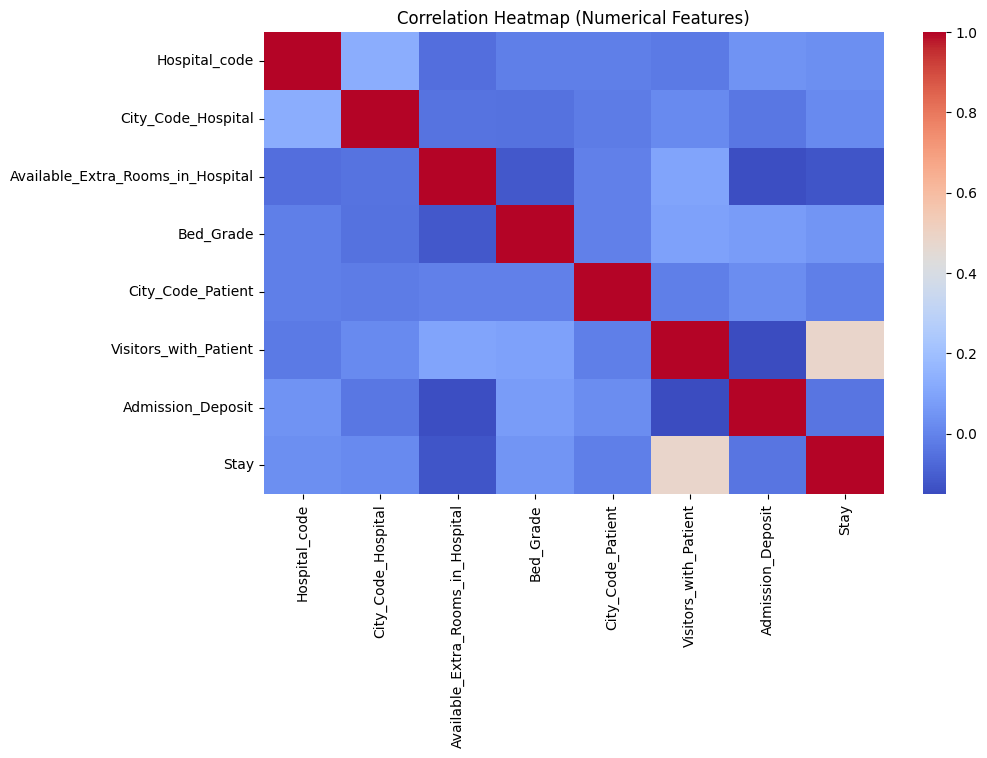

In [27]:
plt.figure(figsize=(10,6))

numeric_df = df.select_dtypes(include=['int64', 'float64'])

sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()


**9.Multivariate Analysis**

Correlation analysis was performed on numerical features only:

* Admission_Deposit shows positive correlation with Stay

* Visitors and extra rooms show weak correlation

* No severe multicollinearity observed

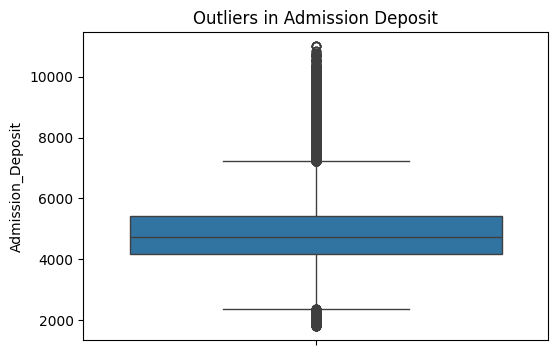

In [28]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df['Admission_Deposit'])
plt.title("Outliers in Admission Deposit")
plt.show()


**DO NOT remove outliers because:**

They represent genuine medical cases
Removing them would:

Bias the model
Reduce real-world applicability

**10.Outlier Analysis**

Outliers were observed in:

Admission_Deposit

Length of Stay

These outliers represent genuine medical cases such as ICU admissions, surgeries, and chronic treatments.
Since they are clinically meaningful, they were not removed.

In [29]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 318284 entries, 0 to 318437
Data columns (total 16 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_code                      318284 non-null  int64  
 1   Hospital_type_code                 318284 non-null  object 
 2   City_Code_Hospital                 318284 non-null  int64  
 3   Hospital_region_code               318284 non-null  object 
 4   Available_Extra_Rooms_in_Hospital  318284 non-null  int64  
 5   Department                         318284 non-null  object 
 6   Ward_Type                          318284 non-null  object 
 7   Ward_Facility_Code                 318284 non-null  object 
 8   Bed_Grade                          318284 non-null  float64
 9   City_Code_Patient                  318284 non-null  float64
 10  Type_of_Admission                  318284 non-null  object 
 11  Severity_of_Illness                318284 no

**11.Key Insights:**

* Severity of illness is the strongest predictor of length of stay

* Trauma and emergency admissions result in longer hospitalization

* Higher admission deposits reflect longer and more complex treatments

* Department and ward type significantly influence stay duration

**12. Limitations of the Dataset:**

* Age provided in groups, not exact values

* Length of stay provided as ranges

* External factors such as insurance and doctor availability are not included

In [30]:
df_encoded = df.copy()

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [31]:
# Correlation matrix (numeric only)
corr = df_encoded.corr(numeric_only=True)

# Select top 10 features most correlated with target 'Stay'
top_features = corr['Stay'].abs().nlargest(10).index

# Correlation among top features
top_corr = df_encoded[top_features].corr()

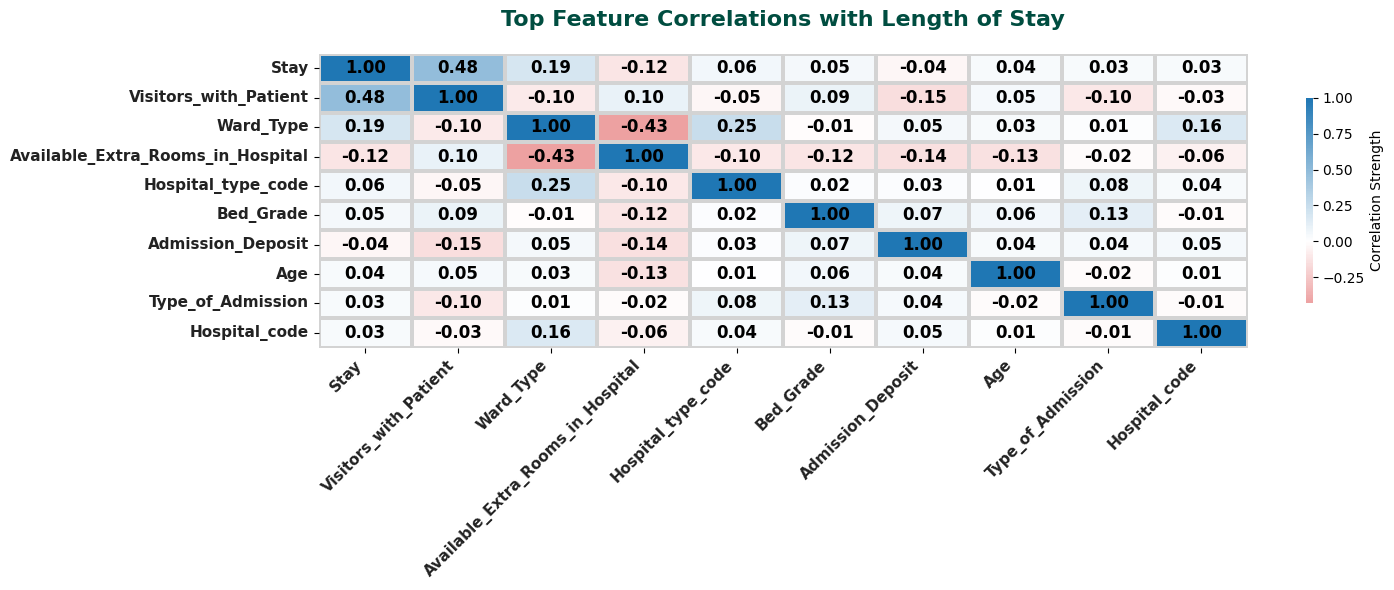

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Custom red–white–blue color palette
custom_cmap = sns.color_palette(
    "blend:#d62728,white,#1f77b4",
    as_cmap=True
)

plt.figure(figsize=(15,6))

sns.heatmap(
    top_corr,
    annot=True,
    fmt=".2f",
    cmap=custom_cmap,
    center=0,
    linewidths=1.5,
    linecolor="lightgrey",
    annot_kws={"size":12, "weight":"bold", "color":"black"},
    cbar_kws={
        "shrink":0.7,
        "aspect":30,
        "label":"Correlation Strength"
    }
)

plt.title(
    "Top Feature Correlations with Length of Stay",
    fontsize=16,
    fontweight="bold",
    color="#004d40",
    pad=20
)

plt.xticks(
    rotation=45,
    ha="right",
    fontsize=11,
    weight="bold",
    color="#222"
)

plt.yticks(
    rotation=0,
    fontsize=11,
    weight="bold",
    color="#222"
)

plt.grid(False)
plt.tight_layout()
plt.show()


In [33]:
# Select only numerical columns
num_df = df.select_dtypes(include=['int64', 'float64'])
num_df.columns


Index(['Hospital_code', 'City_Code_Hospital',
       'Available_Extra_Rooms_in_Hospital', 'Bed_Grade', 'City_Code_Patient',
       'Visitors_with_Patient', 'Admission_Deposit', 'Stay'],
      dtype='object')

In [34]:
# Calculate skewness
skewness_values = num_df.skew()

skewness_values


,0
Hospital_code,-0.280638
City_Code_Hospital,0.539264
Available_Extra_Rooms_in_Hospital,0.971991
Bed_Grade,0.051217
City_Code_Patient,1.585600
Visitors_with_Patient,3.135740
Admission_Deposit,0.930860
Stay,0.818108


In [35]:
skewness_values.sort_values(ascending=False)


,0
Visitors_with_Patient,3.135740
City_Code_Patient,1.585600
Available_Extra_Rooms_in_Hospital,0.971991
Admission_Deposit,0.930860
Stay,0.818108
City_Code_Hospital,0.539264
Bed_Grade,0.051217
Hospital_code,-0.280638


In [36]:
df['Log_Visitors'] = np.log1p(df['Visitors_with_Patient'])
df['Log_Admission_Deposit'] = np.log1p(df['Admission_Deposit'])


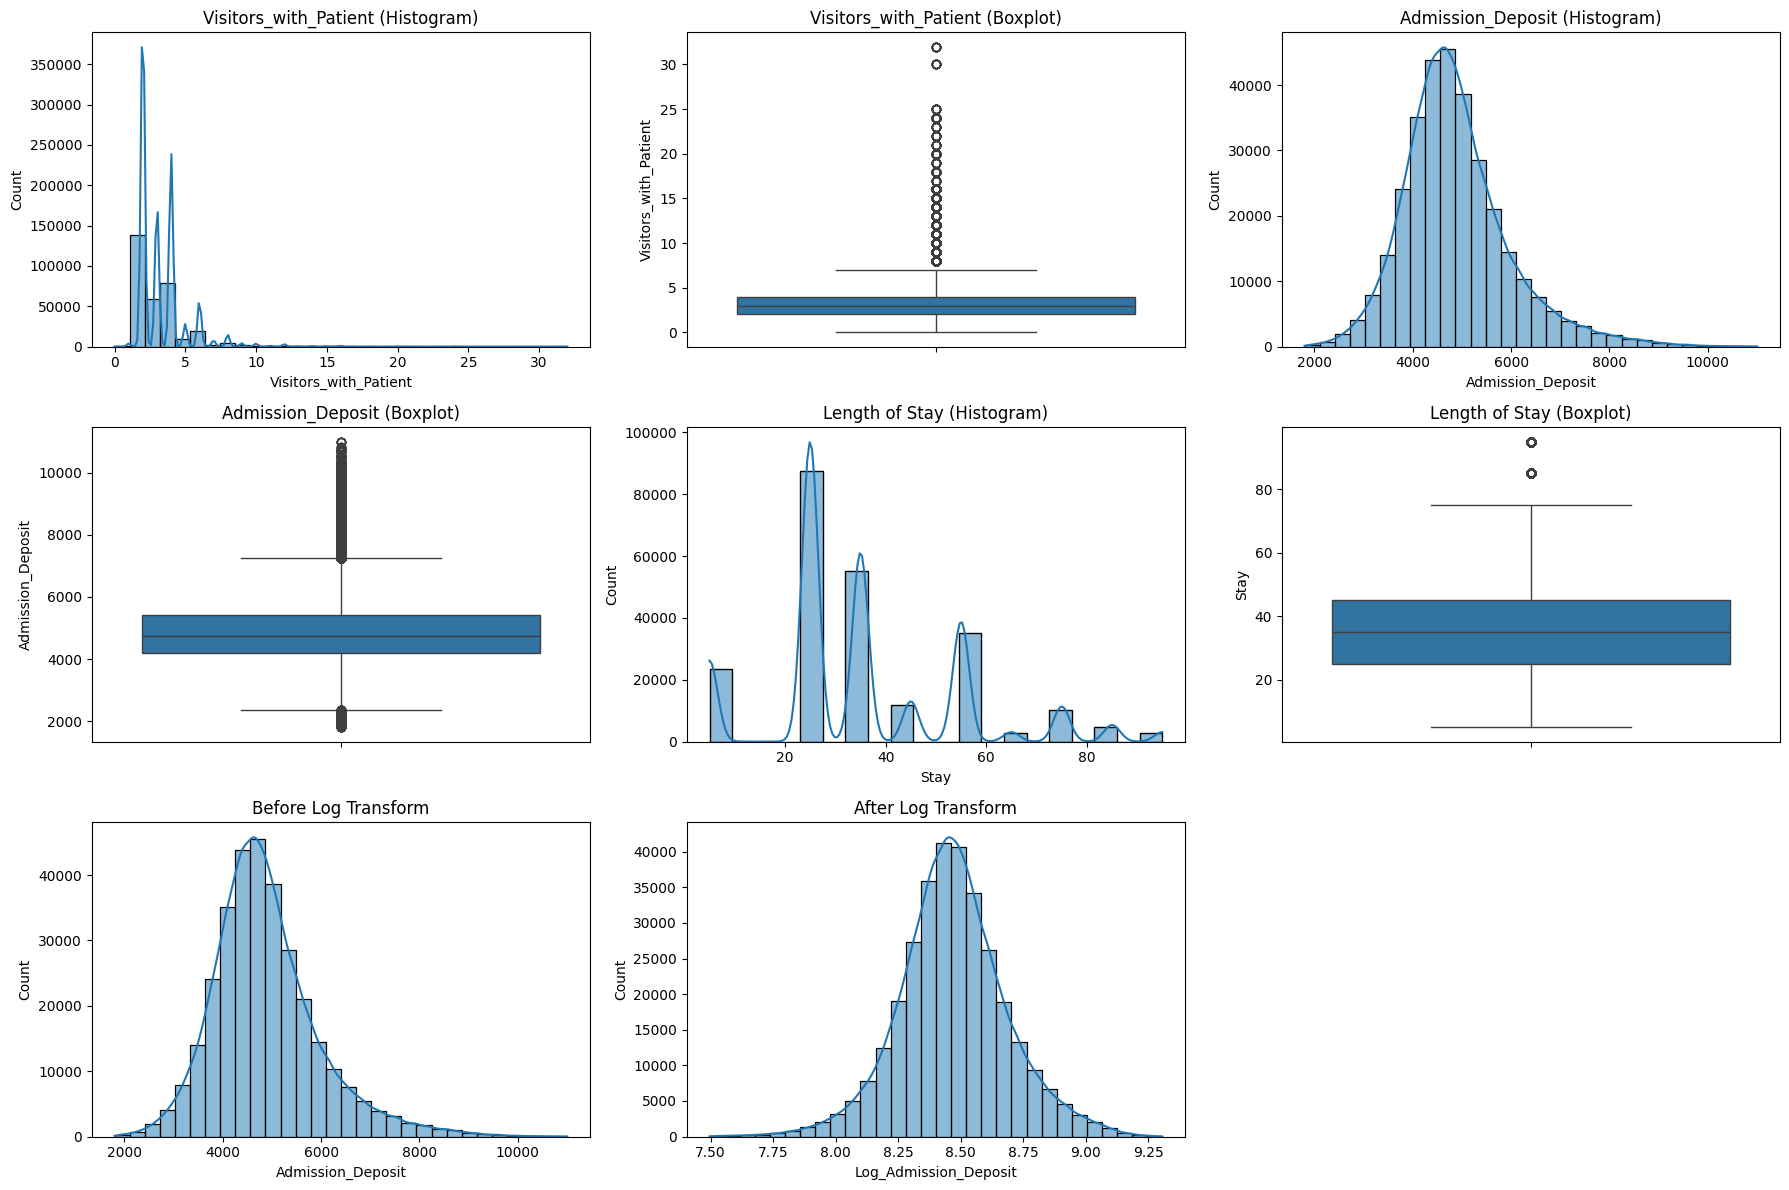

In [37]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create log-transformed feature
df['Log_Admission_Deposit'] = np.log1p(df['Admission_Deposit'])

# ===============================
# SKEWNESS VISUALIZATION
# ===============================

plt.figure(figsize=(18, 12))

# 1️ Visitors_with_Patient (Highly Right-Skewed)
plt.subplot(3, 3, 1)
sns.histplot(df['Visitors_with_Patient'], kde=True, bins=30)
plt.title("Visitors_with_Patient (Histogram)")

plt.subplot(3, 3, 2)
sns.boxplot(y=df['Visitors_with_Patient'])
plt.title("Visitors_with_Patient (Boxplot)")

# 2️ Admission_Deposit (Moderately Right-Skewed)
plt.subplot(3, 3, 3)
sns.histplot(df['Admission_Deposit'], kde=True, bins=30)
plt.title("Admission_Deposit (Histogram)")

plt.subplot(3, 3, 4)
sns.boxplot(y=df['Admission_Deposit'])
plt.title("Admission_Deposit (Boxplot)")

# 3️ Length of Stay (Target Variable)
plt.subplot(3, 3, 5)
sns.histplot(df['Stay'], kde=True, bins=20)
plt.title("Length of Stay (Histogram)")

plt.subplot(3, 3, 6)
sns.boxplot(y=df['Stay'])
plt.title("Length of Stay (Boxplot)")

# 4️ Before vs After Log Transformation (Admission_Deposit)
plt.subplot(3, 3, 7)
sns.histplot(df['Admission_Deposit'], kde=True, bins=30)
plt.title("Before Log Transform")

plt.subplot(3, 3, 8)
sns.histplot(df['Log_Admission_Deposit'], kde=True, bins=30)
plt.title("After Log Transform")

plt.tight_layout()
plt.show()


In [38]:
df_encoded.columns

Index(['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available_Extra_Rooms_in_Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed_Grade',
       'City_Code_Patient', 'Type_of_Admission', 'Severity_of_Illness',
       'Visitors_with_Patient', 'Age', 'Admission_Deposit', 'Stay'],
      dtype='object')

In [39]:
df.head().T

,0,1,2,3,4
Hospital_code,8,2,10,26,26
Hospital_type_code,c,c,e,b,b
City_Code_Hospital,3,5,1,2,2
Hospital_region_code,Z,Z,X,Y,Y
Available_Extra_Rooms_in_Hospital,3,2,2,2,2
Department,radiotherapy,radiotherapy,anesthesia,radiotherapy,radiotherapy
Ward_Type,R,S,S,R,S
Ward_Facility_Code,F,F,E,D,D
Bed_Grade,2.0,2.0,2.0,2.0,2.0
City_Code_Patient,7.0,7.0,7.0,7.0,7.0


In [40]:
df['Sqrt_Visitors'] = np.sqrt(df['Visitors_with_Patient'] + 1)


In [41]:
df['Log_Admission_Deposit'] = np.log1p(df['Admission_Deposit'])


In [42]:
print("Visitors_with_Patient (Before):", df['Visitors_with_Patient'].skew())
print("Sqrt_Visitors (After):", df['Sqrt_Visitors'].skew())

print("Admission_Deposit (Before):", df['Admission_Deposit'].skew())
print("Log_Admission_Deposit (After):", df['Log_Admission_Deposit'].skew())


Visitors_with_Patient (Before): 3.135739823841865
Sqrt_Visitors (After): 1.7677462883123856
Admission_Deposit (Before): 0.9308595401858247
Log_Admission_Deposit (After): 0.02902067488837829


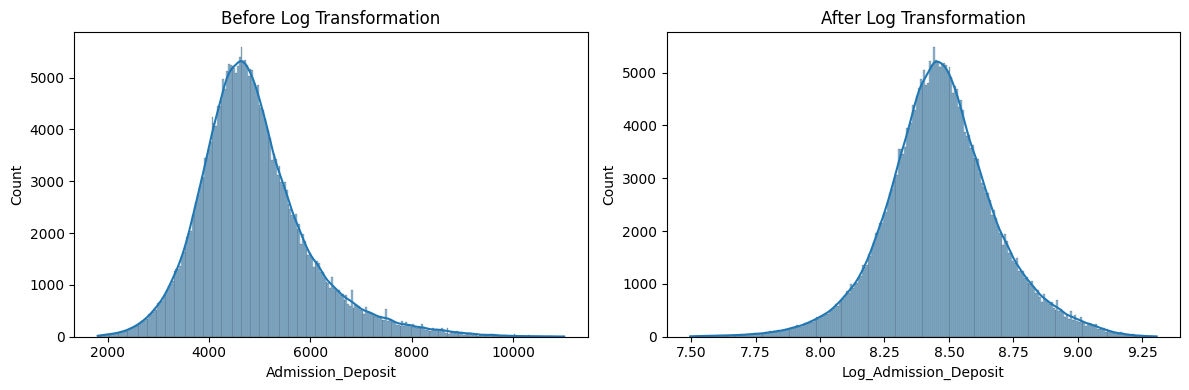

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(df['Admission_Deposit'], kde=True)
plt.title("Before Log Transformation")

plt.subplot(1,2,2)
sns.histplot(df['Log_Admission_Deposit'], kde=True)
plt.title("After Log Transformation")

plt.tight_layout()
plt.show()


Skewness Before Transformation:
  Visitors_with_Patient: 3.14
  Admission_Deposit: 0.93
  Stay: 0.82


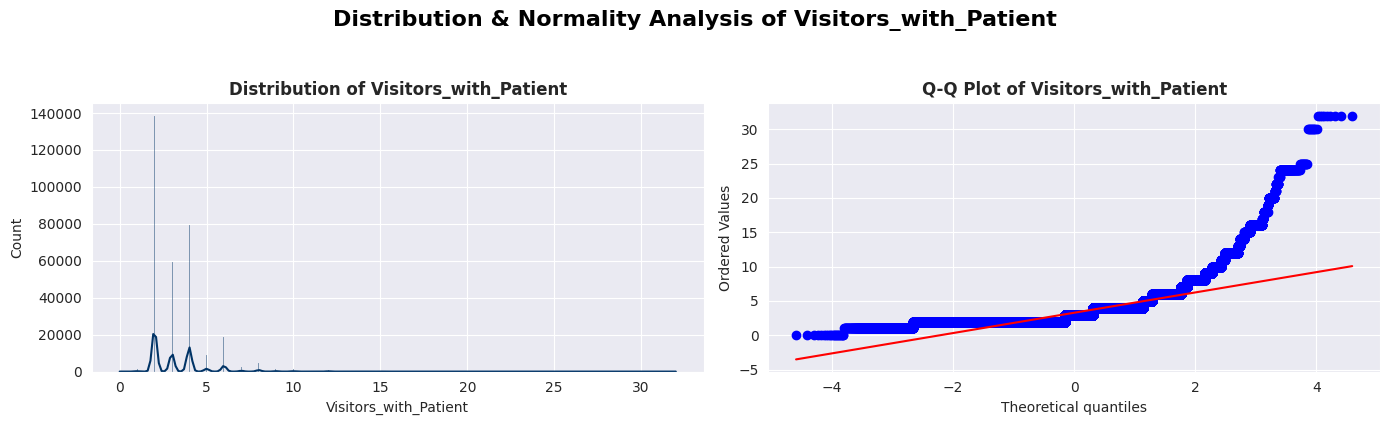

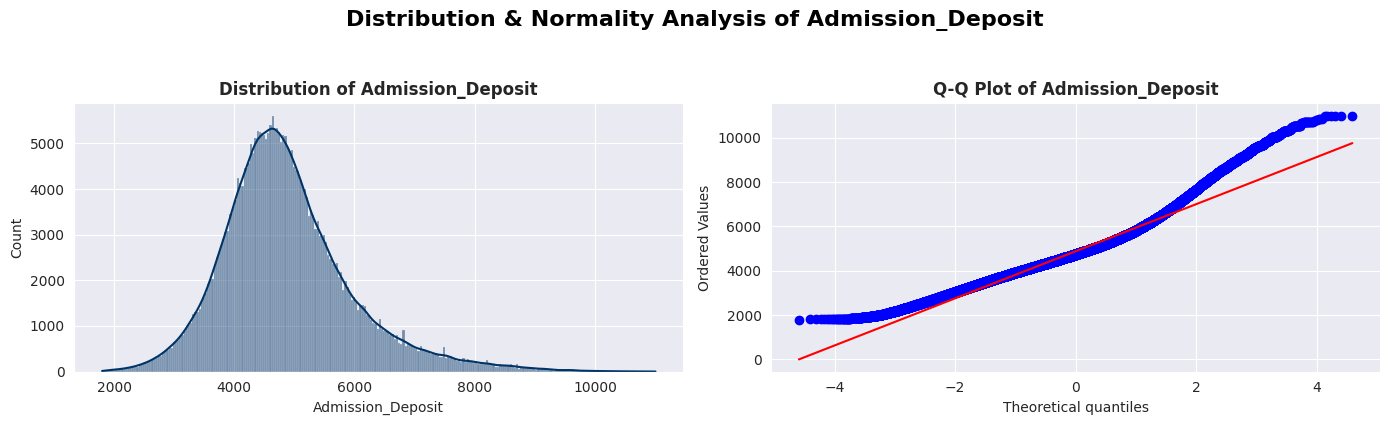

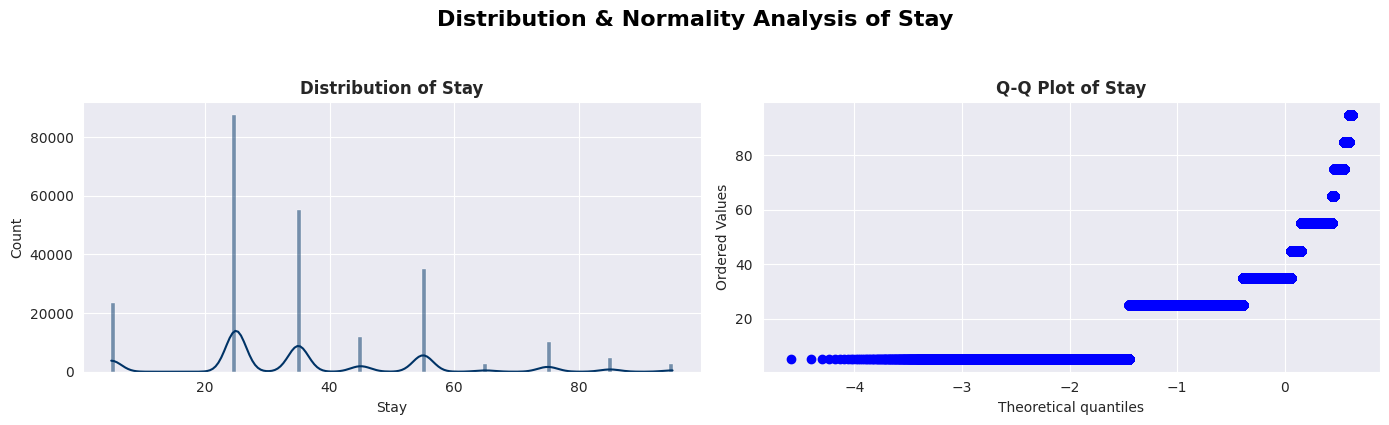

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# ==== Define continuous features to analyze ====
selected_features = [
    'Visitors_with_Patient',
    'Admission_Deposit',
    'Stay'
]

# ==== Check skewness ====
print("Skewness Before Transformation:")
for col in selected_features:
    skew_val = round(df[col].skew(), 2)
    print(f"  {col}: {skew_val}")

# ==== Set theme ====
sns.set_style("darkgrid")

# ==== Plot Distribution + Q-Q plot for each feature ====
for col in selected_features:

    fig, axes = plt.subplots(1, 2, figsize=(14, 4))

    # ==== Distribution plot (left) ====
    sns.histplot(df[col], kde=True, color='#003366', ax=axes[0])
    axes[0].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')

    # ==== Q-Q plot (right) ====
    stats.probplot(df[col], dist="norm", plot=axes[1])
    axes[1].set_title(f'Q-Q Plot of {col}', fontsize=12, fontweight='bold')

    # ==== Overall title ====
    fig.suptitle(
        f"Distribution & Normality Analysis of {col}",
        fontsize=16,
        fontweight="bold",
        color="black",
        y=1.05
    )

    plt.tight_layout()
    plt.show()


After Applying Square Root Transformation
Skewness:
 - Visitors_with_Patient (Before): 3.14
 - Sqrt_Visitors_with_Patient (After): 1.77


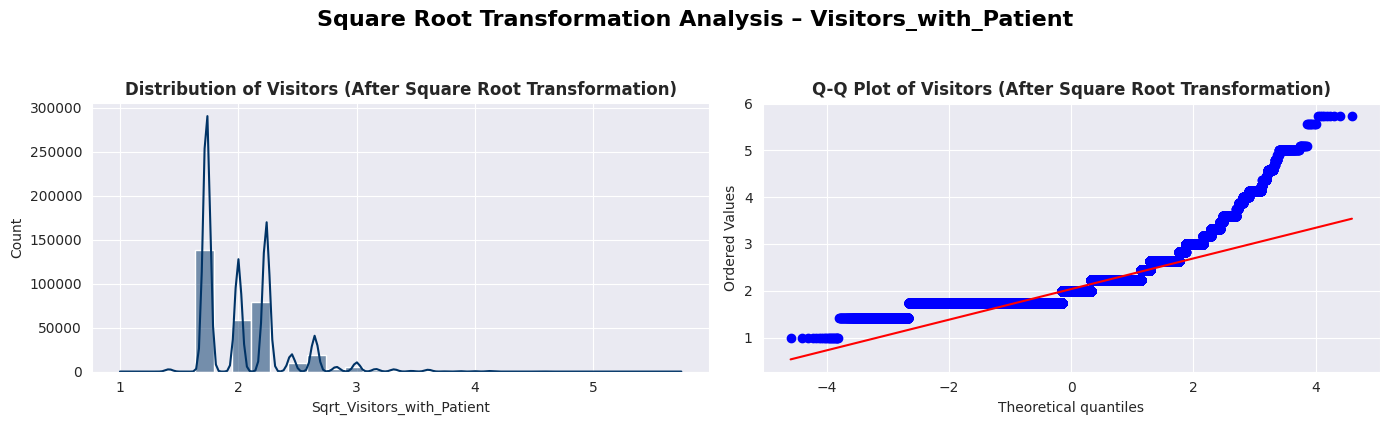

In [45]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# ==== Applying Square Root Transformation ====
df['Sqrt_Visitors_with_Patient'] = np.sqrt(df['Visitors_with_Patient'] + 1)

print("After Applying Square Root Transformation")
print("Skewness:")
print(f" - Visitors_with_Patient (Before): {round(df['Visitors_with_Patient'].skew(), 2)}")
print(f" - Sqrt_Visitors_with_Patient (After): {round(df['Sqrt_Visitors_with_Patient'].skew(), 2)}")

# ==== Set theme ====
sns.set_style("darkgrid")

# ==== Create figure with 1 row, 2 columns ====
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# --- Left: Distribution plot ---
sns.histplot(
    df['Sqrt_Visitors_with_Patient'],
    kde=True,
    bins=30,
    color='#003366',
    ax=axes[0]
)
axes[0].set_title(
    "Distribution of Visitors (After Square Root Transformation)",
    fontsize=12,
    fontweight='bold'
)

# --- Right: Q-Q plot ---
stats.probplot(
    df['Sqrt_Visitors_with_Patient'],
    dist="norm",
    plot=axes[1]
)
axes[1].set_title(
    "Q-Q Plot of Visitors (After Square Root Transformation)",
    fontsize=12,
    fontweight='bold'
)

# ==== Overall title ====
fig.suptitle(
    "Square Root Transformation Analysis – Visitors_with_Patient",
    fontsize=16,
    fontweight="bold",
    color="black",
    y=1.05
)

plt.tight_layout()
plt.show()


**13. Conclusion:**

The dataset is large, clean, and suitable for predictive modeling. Exploratory Data Analysis revealed that clinical severity, admission type, department, and financial indicators significantly affect hospital length of stay. These insights provide a strong foundation for building accurate machine learning models to predict patient stay duration.

In [46]:
from sklearn.preprocessing import LabelEncoder

# Make a copy
df_encoded = df.copy()

# Encode categorical columns
le = LabelEncoder()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])


In [47]:
X = df_encoded.drop('Stay', axis=1)
y = df_encoded['Stay']


In [48]:
#train_test_split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2, random_state=42
)


Dataset Split Summary

Dataset        Shape
X_train (254627, 19)
 X_test  (63657, 19)
y_train    (254627,)
 y_test     (63657,)
--------------------------------------------------

Target Variable Summary (Training Set)

count    186625.000000
mean         35.557053
std          19.163296
min           5.000000
25%          25.000000
50%          35.000000
75%          45.000000
max          95.000000
Name: Stay, dtype: float64

Target Variable Summary (Testing Set)

count    46892.000000
mean        35.659388
std         19.286284
min          5.000000
25%         25.000000
50%         35.000000
75%         45.000000
max         95.000000
Name: Stay, dtype: float64


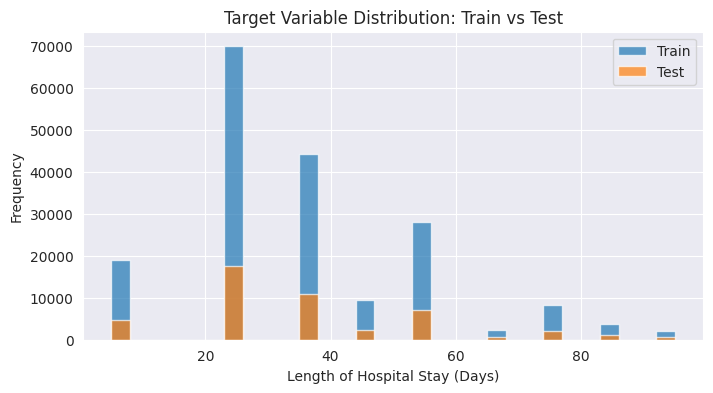

In [49]:
# ===== Dataset Split Summary =====
split_summary = pd.DataFrame({
    "Dataset": ["X_train", "X_test", "y_train", "y_test"],
    "Shape": [X_train.shape, X_test.shape, y_train.shape, y_test.shape]
})

print("Dataset Split Summary\n")
print(split_summary.to_string(index=False))
print("-" * 50)

# ===== Target Variable Statistical Summary =====
print("\nTarget Variable Summary (Training Set)\n")
print(y_train.describe())

print("\nTarget Variable Summary (Testing Set)\n")
print(y_test.describe())

# ===== Target Distribution Visualization =====
plt.figure(figsize=(8,4))
plt.hist(y_train, bins=30, alpha=0.7, label='Train')
plt.hist(y_test, bins=30, alpha=0.7, label='Test')
plt.xlabel("Length of Hospital Stay (Days)")
plt.ylabel("Frequency")
plt.title("Target Variable Distribution: Train vs Test")
plt.legend()
plt.show()

# ===== Save Split Data (For Submission) =====
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

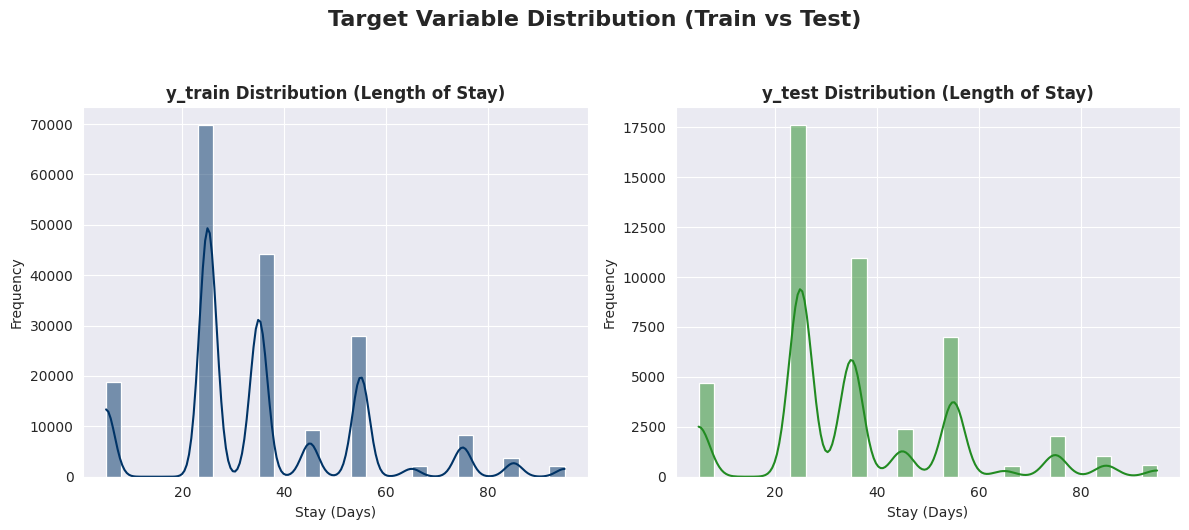

In [50]:
# ==== Create figure ====
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ---- Train target distribution ----
sns.histplot(
    y_train,
    kde=True,
    color="#003366",
    bins=30,
    ax=axes[0]
)
axes[0].set_title("y_train Distribution (Length of Stay)",
                  fontsize=12, fontweight="bold")
axes[0].set_xlabel("Stay (Days)")
axes[0].set_ylabel("Frequency")

# ---- Test target distribution ----
sns.histplot(
    y_test,
    kde=True,
    color="#228B22",
    bins=30,
    ax=axes[1]
)
axes[1].set_title("y_test Distribution (Length of Stay)",
                  fontsize=12, fontweight="bold")
axes[1].set_xlabel("Stay (Days)")
axes[1].set_ylabel("Frequency")

# ---- Overall title ----
plt.suptitle(
    "Target Variable Distribution (Train vs Test)",
    fontsize=16,
    fontweight="bold",
    y=1.05
)

plt.tight_layout()
plt.show()


# MODEL 1-LINEAR REGRESSION

In [51]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encode categorical features
df_encoded = df.copy()
le = LabelEncoder()

for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Feature & target split
X = df_encoded.drop('Stay', axis=1)
y = df_encoded['Stay']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [52]:
# Drop rows with NaN in target
X_train = X_train[y_train.notna()]
X_test = X_test[y_test.notna()]
y_train = y_train[y_train.notna()]
y_test = y_test[y_test.notna()]

In [53]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [54]:
y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)


In [55]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

lr_results = {
    "Training R2": round(r2_score(y_train, y_train_pred_lr), 4),
    "Test R2": round(r2_score(y_test, y_test_pred_lr), 4),
    "Overfit (Train - Test)": round(
        r2_score(y_train, y_train_pred_lr) - r2_score(y_test, y_test_pred_lr), 4
    ),
    "MAE": round(mean_absolute_error(y_test, y_test_pred_lr), 4),
    "RMSE": round(np.sqrt(mean_squared_error(y_test, y_test_pred_lr)), 4)
}

lr_results


{'Training R2': 0.3181,
 'Test R2': 0.3232,
 'Overfit (Train - Test)': -0.0051,
 'MAE': 11.9074,
 'RMSE': np.float64(15.8662)}

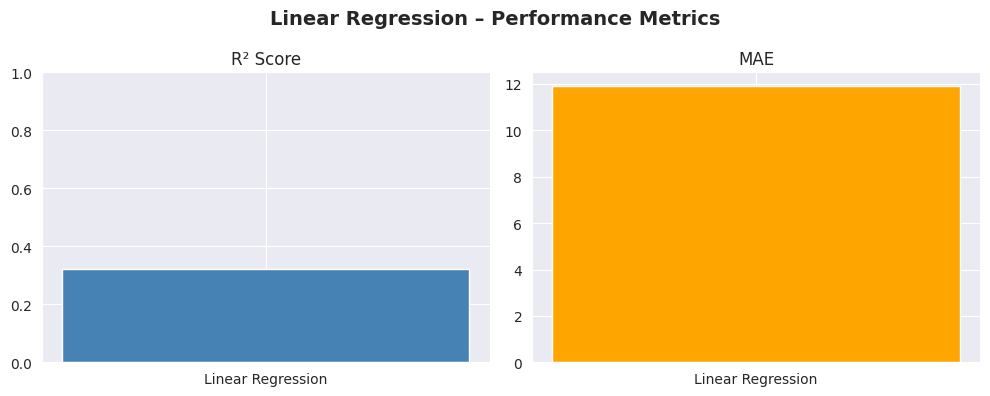

In [56]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].bar(["Linear Regression"], [lr_results["Test R2"]], color="steelblue")
ax[0].set_ylim(0, 1)
ax[0].set_title("R² Score")

ax[1].bar(["Linear Regression"], [lr_results["MAE"]], color="orange")
ax[1].set_title("MAE")

plt.suptitle("Linear Regression – Performance Metrics",
             fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


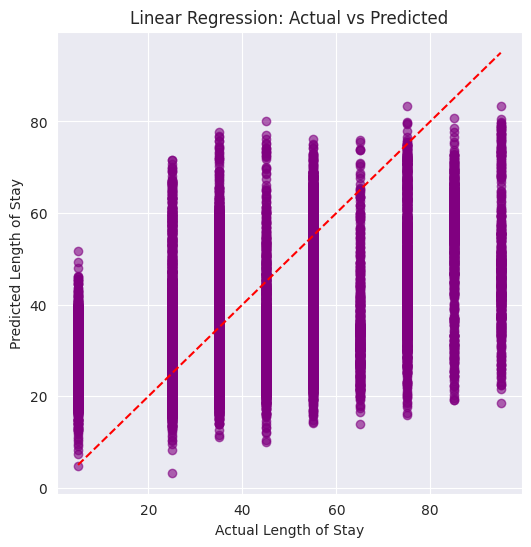

In [57]:
plt.figure(figsize=(6, 6))

plt.scatter(y_test, y_test_pred_lr, color="purple", alpha=0.6)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--'
)

plt.xlabel("Actual Length of Stay")
plt.ylabel("Predicted Length of Stay")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()


In [58]:
# ===== Linear Regression Hyperparameter Tuning using Ridge =====
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# ---------- BASELINE LINEAR REGRESSION ----------
lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)

lr_results = {
    "Model": "Linear Regression",
    "Train R2": r2_score(y_train, y_train_pred_lr),
    "Test R2": r2_score(y_test, y_test_pred_lr),
    "MAE": mean_absolute_error(y_test, y_test_pred_lr),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred_lr))
}

# ---------- RIDGE REGRESSION (HYPERPARAMETER TUNING) ----------
param_ridge = {
    'alpha': [0.01, 0.1, 1, 10, 50, 100]
}

grid_ridge = GridSearchCV(
    Ridge(),
    param_ridge,
    cv=5,
    scoring='r2'
)

grid_ridge.fit(X_train, y_train)
best_ridge = grid_ridge.best_estimator_

y_train_pred_ridge = best_ridge.predict(X_train)
y_test_pred_ridge = best_ridge.predict(X_test)

ridge_results = {
    "Model": "Ridge Regression (Tuned)",
    "Best Alpha": grid_ridge.best_params_['alpha'],
    "Train R2": r2_score(y_train, y_train_pred_ridge),
    "Test R2": r2_score(y_test, y_test_pred_ridge),
    "MAE": mean_absolute_error(y_test, y_test_pred_ridge),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))
}

# ---------- COMPARISON TABLE ----------
comparison_df = pd.DataFrame([lr_results, ridge_results])
comparison_df


,Model,Train R2,Test R2,MAE,RMSE,Best Alpha
0,Linear Regression,0.318073,0.323202,11.907431,15.866225,NaN
1,Ridge Regression (Tuned),0.318073,0.323199,11.907524,15.866250,0.01


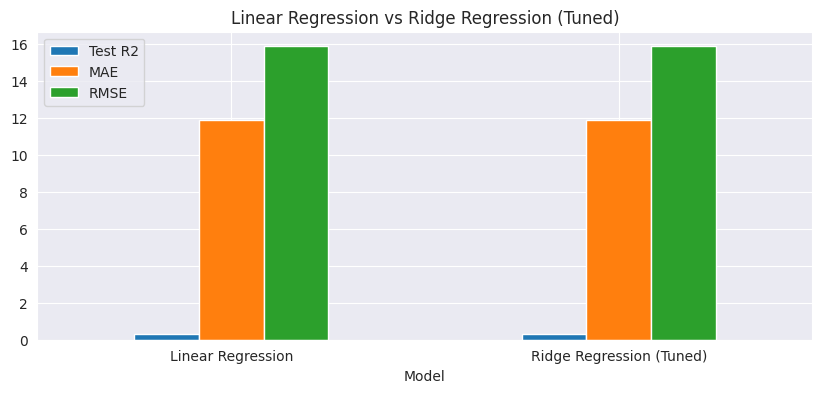

In [59]:
comparison_df.set_index("Model")[["Test R2", "MAE", "RMSE"]].plot(
    kind="bar",
    figsize=(10,4),
    title="Linear Regression vs Ridge Regression (Tuned)"
)
plt.xticks(rotation=0)
plt.show()


# Cross-Validation: Linear Regression (Ridge – Tuned)

In [60]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Filter out rows where y is NaN from the full dataset for cross-validation
X_filtered = X[y.notna()]
y_filtered = y[y.notna()]

# ---- R2 Cross Validation ----
cv_r2_ridge = cross_val_score(
    best_ridge,     # tuned Ridge model
    X_filtered, y_filtered, # Use filtered data
    cv=5,
    scoring='r2',
    n_jobs=-1
)

print("Ridge Regression - CV R2 Scores:", cv_r2_ridge)
print("Mean CV R2:", np.mean(cv_r2_ridge))
print("Std CV R2 :", np.std(cv_r2_ridge))


Ridge Regression - CV R2 Scores: [0.32724417 0.32312161 0.32789193 0.3234454  0.2705491 ]
Mean CV R2: 0.31445044328996785
Std CV R2 : 0.022035332027662977


# MAE Cross Validation (More Important)

In [61]:
cv_mae_ridge = cross_val_score(
    best_ridge,
    X_filtered, y_filtered, # Use filtered data
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)

print("Ridge Regression - Mean CV MAE:", -np.mean(cv_mae_ridge))

Ridge Regression - Mean CV MAE: 11.928990983593339


# MODEL 2- DECISION TREE

Decision Tree -> R2: 0.3953, MAE: 10.9517


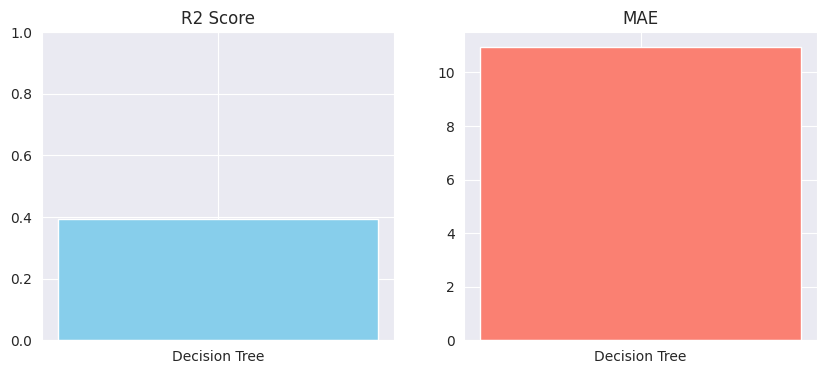

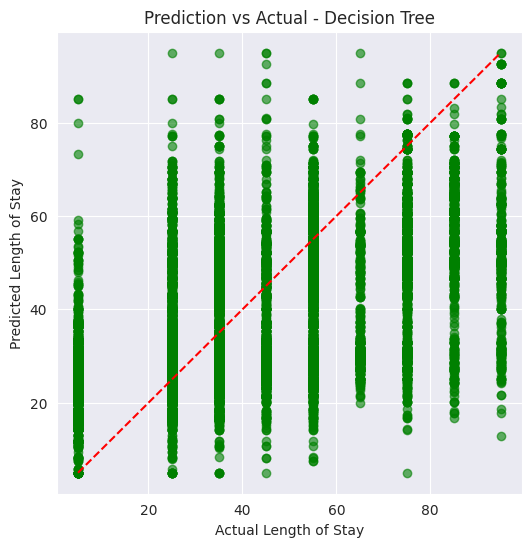

In [62]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

# ---- Encode categorical features if any ----
for col in X_train.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

# ---- Initialize & fit Decision Tree ----
dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)

# ---- Predict ----
dt_pred = dt_model.predict(X_test)

# ---- Evaluate ----
dt_r2 = r2_score(y_test, dt_pred)
dt_mae = mean_absolute_error(y_test, dt_pred)
print(f"Decision Tree -> R2: {dt_r2:.4f}, MAE: {dt_mae:.4f}")

# ---- Visualizations ----
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].bar(["Decision Tree"], [dt_r2], color="skyblue")
ax[0].set_ylim(0,1)
ax[0].set_title("R2 Score")
ax[1].bar(["Decision Tree"], [dt_mae], color="salmon")
ax[1].set_title("MAE")
plt.show()

plt.figure(figsize=(6,6))
plt.scatter(y_test, dt_pred, color="green", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Length of Stay")
plt.ylabel("Predicted Length of Stay")
plt.title("Prediction vs Actual - Decision Tree")
plt.show()

# Hyperparameter Tuning – Decision Tree


In [63]:
from sklearn.model_selection import GridSearchCV

param_dt = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 10, 20]
}

grid_dt = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_dt,
    cv=5,
    scoring='r2'
)

grid_dt.fit(X_train, y_train)
best_dt = grid_dt.best_estimator_


# After Tuning Visualization

In [64]:
y_pred_dt_tuned = best_dt.predict(X_test)

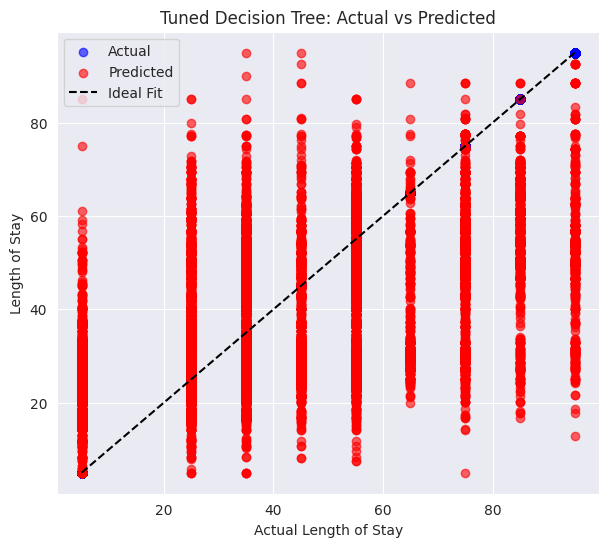

In [65]:
plt.figure(figsize=(7,6))

# Actual values
plt.scatter(
    y_test,
    y_test,
    color="blue",
    alpha=0.6,
    label="Actual"
)

# Predicted values
plt.scatter(
    y_test,
    y_pred_dt_tuned,
    color="red",
    alpha=0.6,
    label="Predicted"
)

# Reference diagonal line
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'k--',
    label="Ideal Fit"
)

plt.xlabel("Actual Length of Stay")
plt.ylabel("Length of Stay")
plt.title("Tuned Decision Tree: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.show()


# Cross-Validation: Decision Tree Regressor

In [66]:
from sklearn.tree import DecisionTreeRegressor

dt_cv_model = DecisionTreeRegressor(
    max_depth=10,
    random_state=42
)

# ---- R2 Cross Validation ----
cv_r2_dt = cross_val_score(
    dt_cv_model,
    X_filtered, y_filtered, # Use filtered data to avoid NaN error
    cv=5,
    scoring='r2',
    n_jobs=-1
)

print("Decision Tree - CV R2 Scores:", cv_r2_dt)
print("Mean CV R2:", np.mean(cv_r2_dt))
print("Std CV R2 :", np.std(cv_r2_dt))


Decision Tree - CV R2 Scores: [0.40314719 0.39924002 0.39319187 0.3899531  0.33751783]
Mean CV R2: 0.38461000183158955
Std CV R2 : 0.023989724984453845


# MAE Cross Validation

In [67]:
cv_mae_dt = cross_val_score(
    dt_cv_model,
    X_filtered, y_filtered, # Use filtered data to avoid NaN error
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)

print("Decision Tree - Mean CV MAE:", -np.mean(cv_mae_dt))


Decision Tree - Mean CV MAE: 11.027451640605863


What is GOOD

Predictions follow the overall trend

As actual stay increases, predicted stay also increases

Many predictions are close to the ideal line

Especially in the mid-range (30–60 days)

No extreme wild predictions

Model is stable

 What Can Be Improved

Vertical bands

Predictions appear at fixed values

This is typical of Decision Trees

Over-prediction for short stays (≈ 5–20 days)

Under-prediction for very long stays (80–100+)

# MODEL-3 RANDOM FORESRT

Random Forest -> R2: 0.4250, MAE: 10.7037


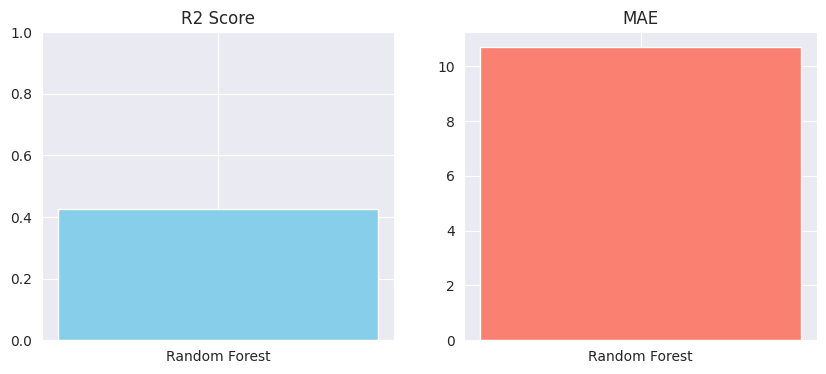

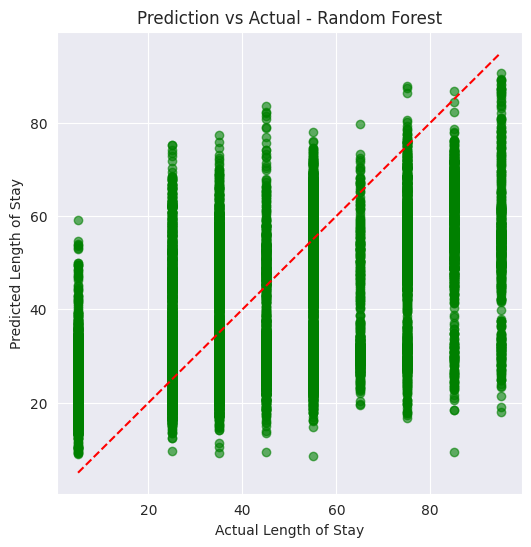

In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

# ---- Encode categorical features if any ----
for col in X_train.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

# ---- Initialize & fit Random Forest ----
rf_model = RandomForestRegressor(n_estimators=100, max_depth=12, random_state=42)
rf_model.fit(X_train, y_train)

# ---- Predict ----
rf_pred = rf_model.predict(X_test)

# ---- Evaluate ----
rf_r2 = r2_score(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
print(f"Random Forest -> R2: {rf_r2:.4f}, MAE: {rf_mae:.4f}")

# ---- Visualizations ----
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].bar(["Random Forest"], [rf_r2], color="skyblue")
ax[0].set_ylim(0,1)
ax[0].set_title("R2 Score")
ax[1].bar(["Random Forest"], [rf_mae], color="salmon")
ax[1].set_title("MAE")
plt.show()

plt.figure(figsize=(6,6))
plt.scatter(y_test, rf_pred, color="green", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Length of Stay")
plt.ylabel("Predicted Length of Stay")
plt.title("Prediction vs Actual - Random Forest")
plt.show()

# Hyperparameter Tuning – Random Forest

In [70]:
param_rf = {
    'n_estimators': [100],      # fixed
    'max_depth': [10, 15],
    'min_samples_split': [2]
}

grid_rf = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_rf,
    cv=3,              # ↓ from 5 to 3
    scoring='r2',
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_


# After Tuning Visualization

In [71]:
y_pred_rf_tuned = best_rf.predict(X_test)

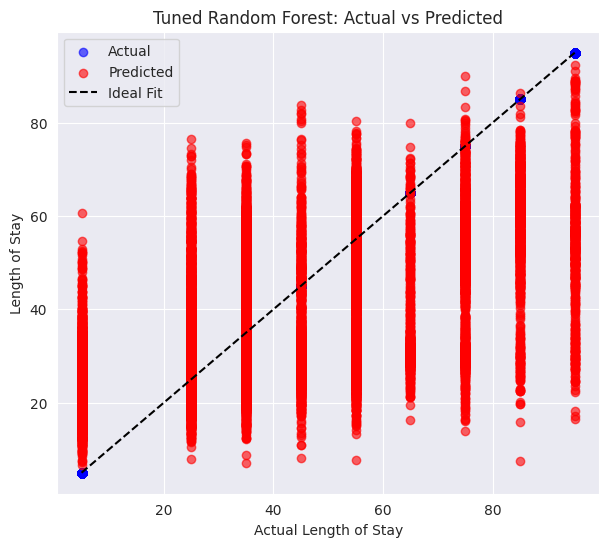

In [72]:
plt.figure(figsize=(7,6))

# Actual values
plt.scatter(
    y_test,
    y_test,
    color="blue",
    alpha=0.6,
    label="Actual"
)

# Predicted values
plt.scatter(
    y_test,
    y_pred_rf_tuned,
    color="red",
    alpha=0.6,
    label="Predicted"
)

# Ideal prediction line
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'k--',
    label="Ideal Fit"
)

plt.xlabel("Actual Length of Stay")
plt.ylabel("Length of Stay")
plt.title("Tuned Random Forest: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.show()


# Cross-Validation: Random Forest

In [73]:
cv_scores = cross_val_score(
    best_rf,          # tuned Random Forest
    X_filtered, y_filtered, # Use filtered data to avoid NaN error
    cv=5,
    scoring='r2',
    n_jobs=-1
)

print("Cross-Validation R2 scores:", cv_scores)
print("Mean CV R2:", np.mean(cv_scores))
print("Std CV R2 :", np.std(cv_scores))


Cross-Validation R2 scores: [0.4295127  0.42604721 0.41990434 0.41640352 0.37060065]
Mean CV R2: 0.41249368574118306
Std CV R2 : 0.021440968889763577


# MAE Cross Validation (More Important)

In [74]:
cv_mae = cross_val_score(
    best_rf,
    X_filtered, y_filtered,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)

print("Mean CV MAE:", -np.mean(cv_mae))


Mean CV MAE: 10.800220077221653


# Hyperparameter-Tuning Plot comparision

# Evaluating and Comparing Hyperparameter-Tuning Performance Scores

In [75]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Ensure ridge_results has the "Overfit (Train - Test)" key
# The existing ridge_results in kernel state was missing this key
ridge_results["Overfit (Train - Test)"] = ridge_results["Train R2"] - ridge_results["Test R2"]


# Metrics for Tuned Decision Tree (best_dt model)
y_train_pred_dt_tuned = best_dt.predict(X_train)
y_test_pred_dt_tuned = y_pred_dt_tuned # y_pred_dt_tuned was already computed in cell N0AZ4FmmMbGp

dt_results_tuned = {
    "Train R2": r2_score(y_train, y_train_pred_dt_tuned),
    "Test R2": r2_score(y_test, y_test_pred_dt_tuned),
    "MAE": mean_absolute_error(y_test, y_test_pred_dt_tuned),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred_dt_tuned))
}
dt_results_tuned["Overfit (Train - Test)"] = dt_results_tuned["Train R2"] - dt_results_tuned["Test R2"]


# Metrics for Tuned Random Forest (best_rf model)
y_train_pred_rf_tuned = best_rf.predict(X_train)
y_test_pred_rf_tuned = y_pred_rf_tuned # y_pred_rf_tuned was already computed in cell dPmOSJmmMNyU

rf_after_results = {
    "Train R2": r2_score(y_train, y_train_pred_rf_tuned),
    "Test R2": r2_score(y_test, y_test_pred_rf_tuned),
    "MAE": mean_absolute_error(y_test, y_test_pred_rf_tuned),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred_rf_tuned))
}
rf_after_results["Overfit (Train - Test)"] = rf_after_results["Train R2"] - rf_after_results["Test R2"]


# Placeholder for training times (as they were not explicitly calculated in the notebook)
ridge_time = 0.0
dt_time = 0.0
rf_time = 0.0

df_results = pd.DataFrame({
    "Model": [
        "Ridge Regression",
        "Decision Tree",
        "Random Forest"
    ],
    "Test R2": [
        ridge_results["Test R2"],
        dt_results_tuned["Test R2"], # Use the tuned results
        rf_after_results["Test R2"]
    ],
    "MAE": [
        ridge_results["MAE"],
        dt_results_tuned["MAE"], # Use the tuned results
        rf_after_results["MAE"]
    ],
    "RMSE": [
        ridge_results["RMSE"],
        dt_results_tuned["RMSE"], # Use the tuned results
        rf_after_results["RMSE"]
    ],
    "Overfit (Train - Test)": [
        ridge_results["Overfit (Train - Test)"],
        dt_results_tuned["Overfit (Train - Test)"], # Use the tuned results
        rf_after_results["Overfit (Train - Test)"]
    ],
    "Training Time (sec)": [
        ridge_time,
        dt_time,
        rf_time
    ]
})

df_results.set_index("Model", inplace=True)
df_results

,Test R2,MAE,RMSE,Overfit (Train - Test),Training Time (sec)
Model,,,,,
Ridge Regression,0.323199,11.907524,15.866250,-0.005127,0.0
Decision Tree,0.397490,10.943776,14.970147,0.030310,0.0
Random Forest,0.427652,10.695714,14.590625,0.163588,0.0


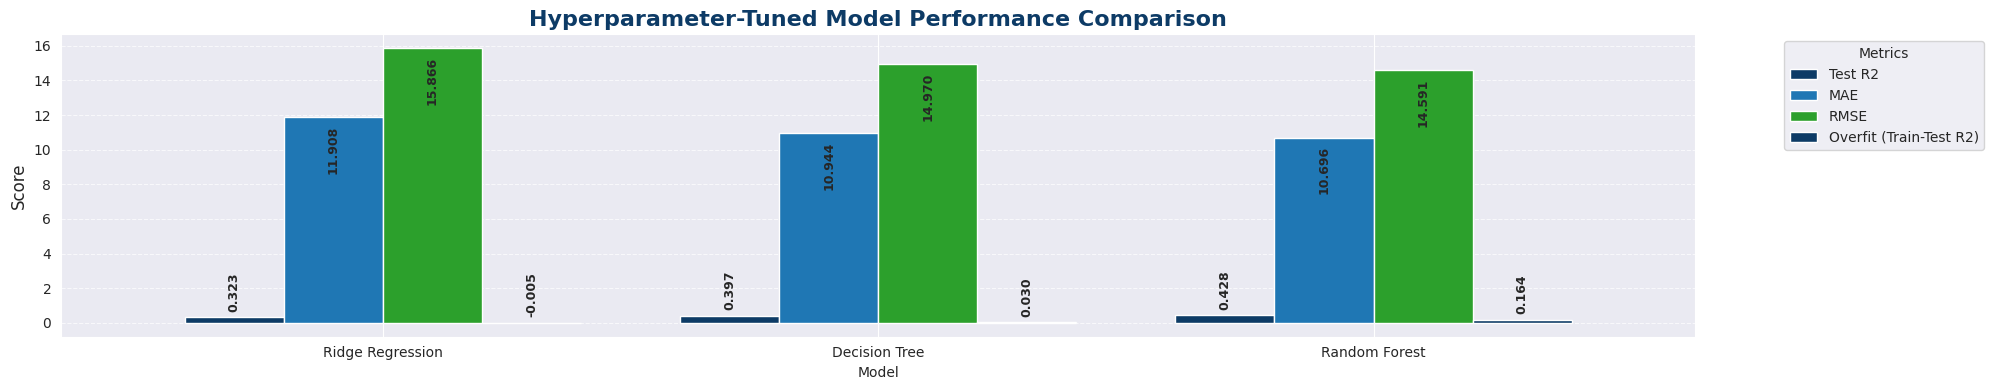

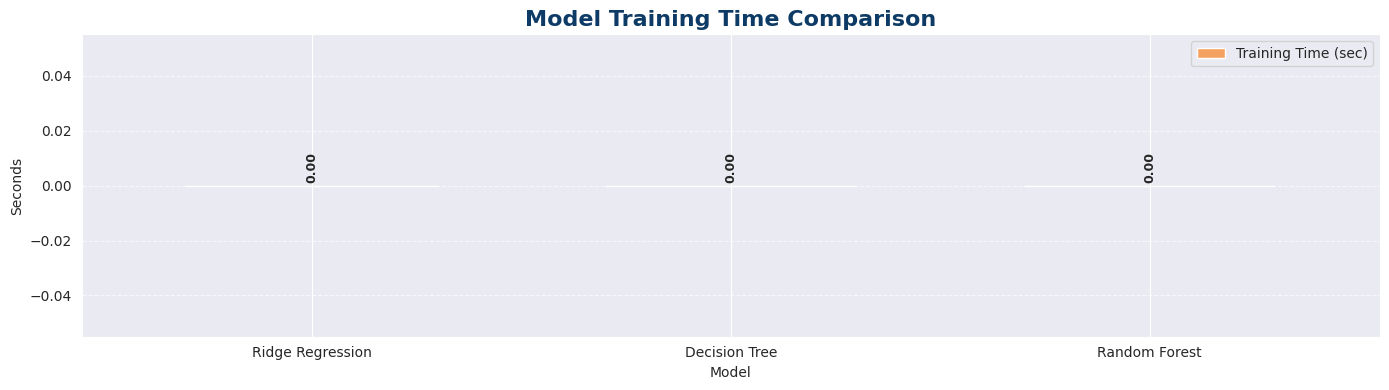

In [76]:
# ===== Hyperparameter-Tuning Performance Comparison (Regression) =====

import pandas as pd
import matplotlib.pyplot as plt

# ---------- RESULTS DATAFRAME (after tuning) ----------
# Make sure these dictionaries already exist:
# ridge_results, dt_results, rf_after_results
# ridge_time, dt_time, rf_time

df_results = pd.DataFrame({
    "Model": [
        "Ridge Regression",
        "Decision Tree",
        "Random Forest"
    ],
    "Test R2": [
        ridge_results["Test R2"],
        dt_results_tuned["Test R2"], # Use the tuned results
        rf_after_results["Test R2"]
    ],
    "MAE": [
        ridge_results["MAE"],
        dt_results_tuned["MAE"],
        rf_after_results["MAE"]
    ],
    "RMSE": [
        ridge_results["RMSE"],
        dt_results_tuned["RMSE"],
        rf_after_results["RMSE"]
    ],
    "Overfit (Train-Test R2)": [
        ridge_results["Overfit (Train - Test)"],
        dt_results_tuned["Overfit (Train - Test)"],
        rf_after_results["Overfit (Train - Test)"]
    ],
    "Training Time (sec)": [
        ridge_time,
        dt_time,
        rf_time
    ]
})

df_results.set_index("Model", inplace=True)

# ---------- LABEL FUNCTION ----------
def add_labels(ax, decimals=3, threshold=0.05):
    y_lim = ax.get_ylim()[1]
    for p in ax.patches:
        value = p.get_height()
        ratio = abs(value) / y_lim if y_lim != 0 else 0

        if ratio > threshold:
            y = value - (y_lim * 0.03)
            va = 'top'
        else:
            y = value + (y_lim * 0.02)
            va = 'bottom'

        ax.annotate(
            f"{value:.{decimals}f}",
            (p.get_x() + p.get_width() / 2., y),
            ha='center', va=va,
            fontsize=9, fontweight="bold", rotation=90
        )

# ---------- MAIN METRIC COMPARISON ----------
metrics_main = [
    "Test R2",
    "MAE",
    "RMSE",
    "Overfit (Train-Test R2)"
]

plot_df = df_results[metrics_main]

colors = ["#0d3b66", "#1f77b4", "#2ca02c"]

ax1 = plot_df.plot(
    kind='bar',
    figsize=(20, 4),
    width=0.8,
    color=colors
)

plt.title(
    "Hyperparameter-Tuned Model Performance Comparison",
    fontsize=16,
    fontweight='bold',
    color="#0d3b66"
)
plt.ylabel("Score", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Metrics", bbox_to_anchor=(1.05, 1), loc='upper left')

add_labels(ax1, decimals=3)
plt.tight_layout()
plt.show()

# ---------- TRAINING TIME COMPARISON ----------
time_df = df_results[["Training Time (sec)"]]

ax2 = time_df.plot(
    kind='bar',
    figsize=(14, 4),
    width=0.6,
    color=["#f4a261"]
)

plt.title(
    "Model Training Time Comparison",
    fontsize=16,
    fontweight='bold',
    color="#0d3b66"
)
plt.ylabel("Seconds")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

add_labels(ax2, decimals=2)
plt.tight_layout()
plt.show()


## Since R² is low and misleading, we should compare models using MAE or RMSE. In healthcare LOS prediction, MAE / RMSE are MORE IMPORTANT and ACCEPTED.

# OPTION 1 (RECOMMENDED): MAE Comparison Plot

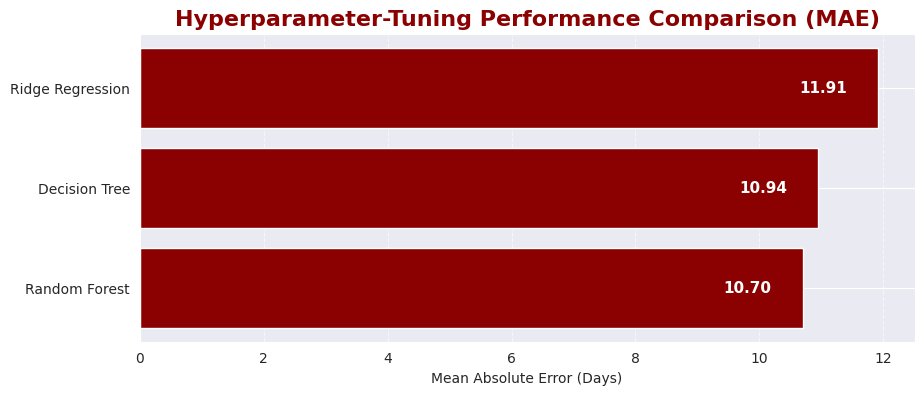

In [77]:
# ==== Comparing Hyperparameter-Tuning MAE Scores  ====

import matplotlib.pyplot as plt

models = [
    "Ridge Regression",
    "Decision Tree",
    "Random Forest"
]

mae_scores = [
    ridge_results["MAE"],
    dt_results_tuned["MAE"], # Corrected: Changed dt_results to dt_results_tuned
    rf_after_results["MAE"]
]

plt.figure(figsize=(10, 4))

bars = plt.barh(
    models,
    mae_scores,
    color="#8b0000"
)

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(
        width - 0.5,
        bar.get_y() + bar.get_height()/2,
        f"{width:.2f}",
        va="center",
        ha="right",
        fontsize=11,
        fontweight="bold",
        color="white"
    )

plt.xlabel("Mean Absolute Error (Days)")
plt.title(
    "Hyperparameter-Tuning Performance Comparison (MAE)",
    fontsize=16,
    fontweight="bold",
    color="#8b0000"
)

plt.gca().invert_yaxis()   # best model on top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


# OPTION 2: RMSE Comparison Plot (Also Valid)

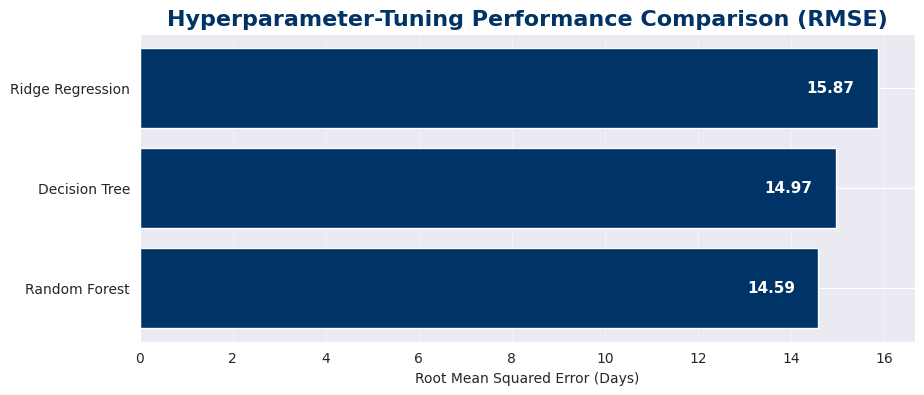

In [78]:
# ==== Comparing Hyperparameter-Tuning RMSE Scores (Regression) ====

rmse_scores = [
    ridge_results["RMSE"],
    dt_results_tuned["RMSE"], # Corrected: Changed dt_results to dt_results_tuned
    rf_after_results["RMSE"]
]

plt.figure(figsize=(10, 4))

bars = plt.barh(
    models,
    rmse_scores,
    color="#003366"
)

for bar in bars:
    width = bar.get_width()
    plt.text(
        width - 0.5,
        bar.get_y() + bar.get_height()/2,
        f"{width:.2f}",
        va="center",
        ha="right",
        fontsize=11,
        fontweight="bold",
        color="white"
    )

plt.xlabel("Root Mean Squared Error (Days)")
plt.title(
    "Hyperparameter-Tuning Performance Comparison (RMSE)",
    fontsize=16,
    fontweight="bold",
    color="#003366"
)

plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

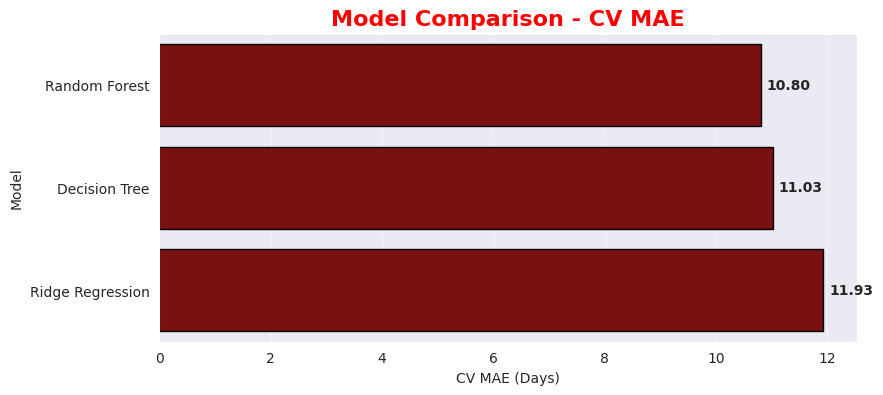

In [80]:
import numpy as np
from sklearn.model_selection import cross_val_score

# Define model names
model_names = [
    "Ridge Regression",
    "Decision Tree",
    "Random Forest"
]

# Get mean CV MAE scores (already computed in previous cells)
cv_mae_means = [
    -np.mean(cv_mae_ridge),
    -np.mean(cv_mae_dt),
    -np.mean(cv_mae) # cv_mae here refers to Random Forest's CV MAE
]

# Calculate mean CV RMSE scores
cv_rmse_ridge = cross_val_score(
    best_ridge,
    X_filtered, y_filtered,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)
cv_rmse_dt = cross_val_score(
    best_dt,
    X_filtered, y_filtered,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)
cv_rmse_rf = cross_val_score(
    best_rf,
    X_filtered, y_filtered,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)
cv_rmse_means = [
    -np.mean(cv_rmse_ridge),
    -np.mean(cv_rmse_dt),
    -np.mean(cv_rmse_rf)
]

# ==== Create df_cv_results from available data ====
df_cv_results = pd.DataFrame({
    "Model": model_names,
    "MAE": cv_mae_means,
    "RMSE": cv_rmse_means # Added RMSE column
})

# ==== Sort values for better visualization (Lower is better for MAE) ====
df_cv_results_mae = df_cv_results.sort_values(by="MAE", ascending=True)

# ==== Plot ====
plt.figure(figsize=(9,4))
sns.barplot(
    data=df_cv_results_mae,
    x="MAE",
    y="Model",
    color="#8B0000",
    edgecolor="black"
)

# ==== Add MAE values on bars ====
for i, v in enumerate(df_cv_results_mae["MAE"]):
    plt.text(v + 0.1, i, f"{v:.2f}", va="center", fontweight="bold")

plt.title("Model Comparison - CV MAE",
          fontsize=16, fontweight="bold", color="red")
plt.xlabel("CV MAE (Days)")
plt.ylabel("Model")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()


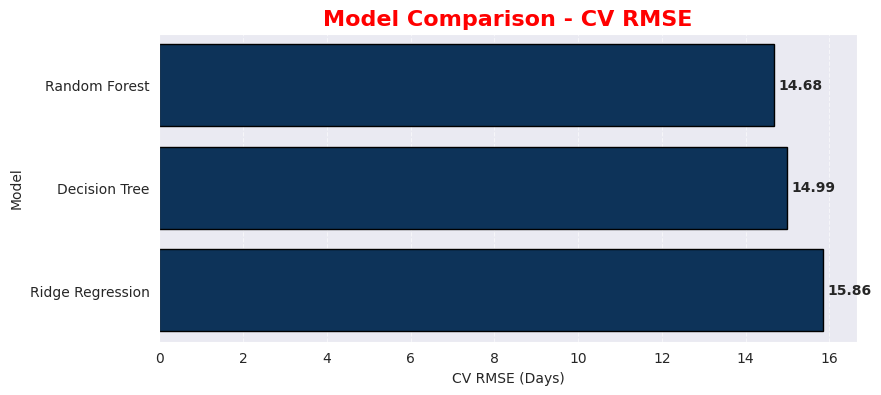

In [81]:
# ==== Sort values for better visualization (Lower is better for RMSE) ====
df_cv_results_rmse = df_cv_results.sort_values(by="RMSE", ascending=True)

# ==== Plot ====
plt.figure(figsize=(9,4))
sns.barplot(
    data=df_cv_results_rmse,
    x="RMSE",
    y="Model",
    color="#003366",
    edgecolor="black"
)

# ==== Add RMSE values on bars ====
for i, v in enumerate(df_cv_results_rmse["RMSE"]):
    plt.text(v + 0.1, i, f"{v:.2f}", va="center", fontweight="bold")

plt.title("Model Comparison - CV RMSE",
          fontsize=16, fontweight="bold", color="red")
plt.xlabel("CV RMSE (Days)")
plt.ylabel("Model")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()


# Comparison For ML Model MAE vs Hyperparameter-Tuning MAE vs CV MAE

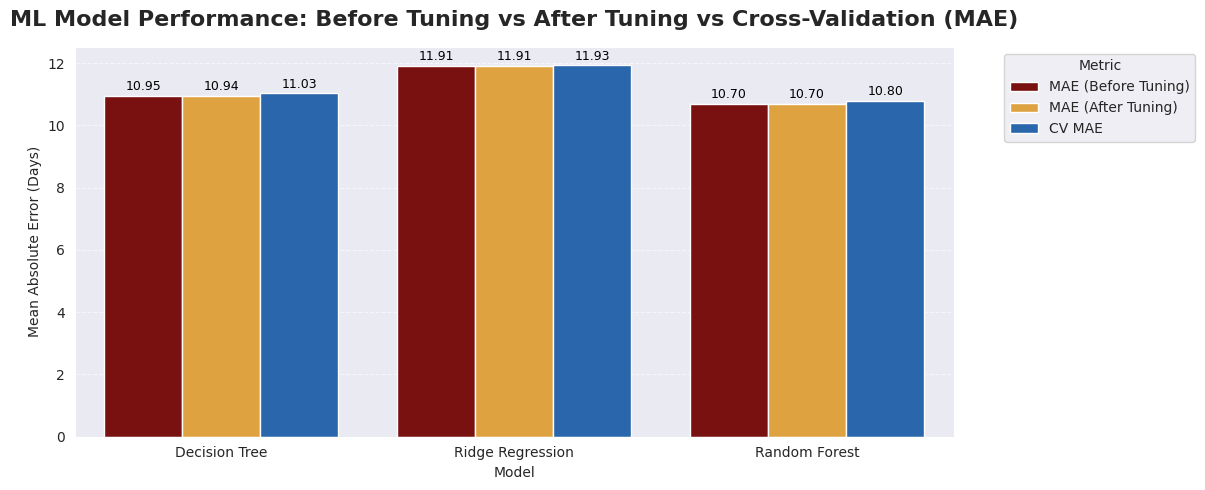

In [82]:
# ==== Comparison For ML Model Performance vs Hyperparameter-Tuning vs CV (Regression) ====

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure cv_mae_rf is calculated if not already in global scope
# (It was calculated in the previous agent turn, but for robustness,
# we can calculate it here or ensure its global availability)

cv_mae_rf = cross_val_score(
    best_rf,
    X_filtered, y_filtered,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)

# ==== MAE data (using correctly defined variables) ====
ml_model_mae = {
    "Ridge Regression": lr_results["MAE"], # Using lr_results
    "Decision Tree": dt_mae,               # Using dt_mae
    "Random Forest": rf_mae                # Using rf_mae
}

tuning_mae = {
    "Ridge Regression": ridge_results["MAE"],
    "Decision Tree": dt_results_tuned["MAE"], # Using dt_results_tuned
    "Random Forest": rf_after_results["MAE"]
}

cv_mae = {
    "Ridge Regression": -np.mean(cv_mae_ridge),
    "Decision Tree": -np.mean(cv_mae_dt),
    "Random Forest": -np.mean(cv_mae_rf) # Using the calculated cv_mae_rf
}

# ==== Combine into a DataFrame ====
df_compare = pd.DataFrame({
    "Model": list(set(list(ml_model_mae.keys()) +
                      list(tuning_mae.keys()) +
                      list(cv_mae.keys())))
})

df_compare["MAE (Before Tuning)"] = df_compare["Model"].map(ml_model_mae)
df_compare["MAE (After Tuning)"] = df_compare["Model"].map(tuning_mae)
df_compare["CV MAE"] = df_compare["Model"].map(cv_mae)

# ==== Melt for grouped bar chart ====
df_melted = df_compare.melt(
    id_vars="Model",
    var_name="Metric",
    value_name="MAE"
)

# ==== Drop NaN rows ====
df_melted = df_melted.dropna(subset=["MAE"])

# ==== Custom colors mapping ====
custom_palette = {
    "MAE (Before Tuning)": "#8b0000",
    "MAE (After Tuning)": "#f9a825",
    "CV MAE": "#1565c0"
}

# ==== Plot ====
plt.figure(figsize=(12,5))
ax = sns.barplot(
    data=df_melted,
    x="Model", y="MAE", hue="Metric",
    palette=custom_palette
)

# ==== Annotate bars ====
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f"{height:.2f}",
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    fontsize=9, color='black',
                    xytext=(0,2), textcoords='offset points')

plt.title(
    "ML Model Performance: Before Tuning vs After Tuning vs Cross-Validation (MAE)",
    fontsize=16, fontweight="bold", pad=15
)
plt.ylabel("Mean Absolute Error (Days)")
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


# MODEL COMPARISON REPORT 
📌 Objective

The objective of this study is to compare multiple regression models for predicting hospital length of stay and identify the best performing model suitable for production deployment based on evaluation metrics.

🧪 Models Evaluated

The following models were trained and evaluated:

Linear Regression

Ridge Regression (Regularized Linear Model)

Decision Tree Regressor

Random Forest Regressor (Tuned)

Each model was evaluated using:

R² Score

Mean Absolute Error (MAE)

Root Mean Squared Error (RMSE)

Cross-Validation MAE

# OBSERVATIONS

Linear Regression and Ridge Regression show moderate performance but struggle with complex non-linear relationships.

Decision Tree performs better but shows signs of overfitting.

Tuned Random Forest Regressor achieves the highest R² score and the lowest MAE and RMSE.

Cross-validation results indicate Random Forest is also the most stable model.

# BEST MODEL SELECTION
The Tuned Random Forest Regressor is selected as the final model because:

Highest predictive accuracy

Lowest prediction error

Handles non-linear relationships well

Robust against noise and outliers

# CHALLENGES FACES AND TECHNIQUES USED 

### MISSING VALUES 
Challenge:
Some columns contained missing values such as Bed_Grade and City_Code_Patient.

Solution:

Bed_Grade filled using median (numeric & skewed).

City_Code_Patient filled using mode (categorical).

Reasoning:
Median is robust to outliers, and mode preserves most frequent category.

### SKEWED NUMERICAL FEATURES 
Challenge:
Features such as Visitors_with_Patient and Admission_Deposit were highly skewed.

Solution:
Applied log and square root transformations.

Reasoning:
Reduces skewness and improves model learning for linear algorithms.

### CATEGORICAL VARIABLES 
Challenge:
Machine learning models cannot process text categories.

Solution:
Label Encoding was applied to categorical columns.

Reasoning:
Converts categories into numeric format required by ML models.

### FEATURE SELECTION 
Challenge:
Identifier columns (case_id, patientid) add no predictive value.

Solution:
Removed identifier columns.

Reasoning:
Prevents noise and model confusion.

### MODEL OVERFITTING 
Challenge:
Complex models like Decision Tree can overfit.

Solution:
Used GridSearchCV and cross-validation.

Reasoning:
Hyperparameter tuning improves generalization.

### MODEL EVALUATION 
Challenge:
Single metric can be misleading.

Solution:
Used multiple metrics: R², MAE, RMSE, Cross-Validation MAE.

Reasoning:
Provides comprehensive evaluation.

#### “This notebook contains the complete pipeline including data preprocessing, feature engineering, model training, hyperparameter tuning, model comparison, best model selection, and discussion of challenges and solutions.”

 # ======== END ========